In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt

from IPython.display import display, Markdown

$$
D_{t,m} \sim \mathcal{B}_{-}\left(\mu=d_{t,m} \;, \sigma^2 = d_{t,m} + \frac{d_{t,m}}{\phi}\right)
$$

$$
\phi \sim \mathcal{N}^+(\mu=0,\sigma=5)
$$

# Phi

Half Normal Distribution
[scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_halfnorm.html)

In [20]:
phi_mu = 0
phi_sd = 5

phi = np.linspace(
    sps.halfnorm.ppf(1e-3, loc=phi_mu, scale=phi_sd), 
    sps.halfnorm.ppf(1-1e-3, loc=phi_mu, scale=phi_sd), 
    20
)

phi_pdf = sps.halfnorm.pdf(phi, loc=phi_mu, scale=phi_sd)

$\mathrm{min}(\phi)=0.006266572327162083$

$\mathrm{max}(\phi)=16.45263365745963$

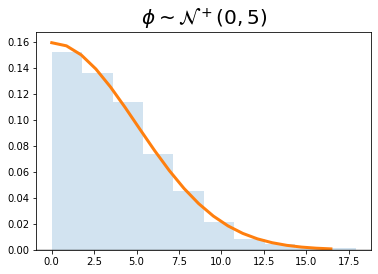

In [21]:
display(Markdown(f"$\mathrm{{min}}(\phi)={min(phi)}$"))
display(Markdown(f"$\mathrm{{max}}(\phi)={max(phi)}$"))
plt.hist(sps.halfnorm.rvs(loc=phi_mu, scale=phi_sd, size=1000), density=True, alpha=0.2)
plt.plot(phi, phi_pdf, lw=3)
plt.title(
    f"$\phi \sim \mathcal{{N}}^+({phi_mu},{phi_sd})$",
    fontsize=20
)
plt.axhline(0, c="k", alpha=.25)
plt.show();

In [4]:
d_tm = np.arange(1, 1e3+1, 1)

In `scipy.stats` la distribuzione binomiale negativa è definita tra i parametri $r$ numero di successi e $p$ probabilità di un singolo successo quindi

$$
r = \frac{\mu^2}{\sigma^2 - \mu}
$$

$$
p = \frac{r}{r + \mu}
$$

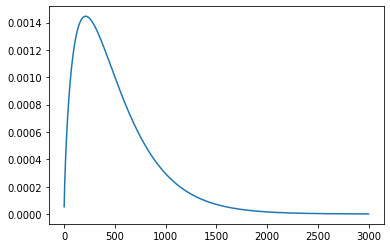

In [88]:
plt.plot(sps.nbinom.pmf(np.arange(0, 3000, 1), n=1.73746310760426347919, p=0.00346289291782790696))

In [106]:
print(r[1][499])
print(p[1][499])
sps.nbinom.pmf(d_tm, n=r[1][499], p=p[1][499])

0.8718648399657128
0.0017406943794782397


array([0.0034196 , 0.00319494, 0.00305316, 0.00295021, 0.0028696 ,
       0.00280343, 0.00274732, 0.00269861, 0.00265556, 0.00261697,
       0.00258199, 0.00254997, 0.00252044, 0.00249302, 0.00246743,
       0.0024434 , 0.00242077, 0.00239935, 0.00237902, 0.00235966,
       0.00234118, 0.0023235 , 0.00230653, 0.00229022, 0.00227452,
       0.00225937, 0.00224473, 0.00223057, 0.00221685, 0.00220354,
       0.00219061, 0.00217804, 0.00216581, 0.00215389, 0.00214227,
       0.00213093, 0.00211985, 0.00210903, 0.00209844, 0.00208807,
       0.00207792, 0.00206798, 0.00205823, 0.00204866, 0.00203927,
       0.00203005, 0.00202099, 0.00201209, 0.00200334, 0.00199472,
       0.00198625, 0.0019779 , 0.00196969, 0.00196159, 0.00195362,
       0.00194575, 0.001938  , 0.00193035, 0.00192281, 0.00191536,
       0.00190801, 0.00190075, 0.00189359, 0.00188651, 0.00187951,
       0.00187259, 0.00186576, 0.001859  , 0.00185232, 0.00184571,
       0.00183917, 0.0018327 , 0.0018263 , 0.00181997, 0.00181

(20, 1000)
(20, 1000)
r= 0.00626657232716208278 p=0.00001253298757657792 phi= 0.00626657232716208278
r= 0.87186483996571284560 p=0.00174069437947823973 phi= 0.87186483996571284560
r= 1.73746310760426347919 p=0.00346289291782790696 phi= 1.73746310760426347919
r= 2.60306137524281444584 p=0.00517915941084841954 phi= 2.60306137524281444584
r= 3.46865964288136519045 p=0.00688952445489207296 phi= 3.46865964288136519045
r= 4.33425791051991549097 p=0.00859401843625881394 phi= 4.33425791051991549097
r= 5.19985617815846623557 p=0.01029267153299572544 phi= 5.19985617815846623557
r= 6.06545444579701698018 p=0.01198551371667806210 phi= 6.06545444579701698018
r= 6.93105271343556772479 p=0.01367257475417202675 phi= 6.93105271343556772479
r= 7.79665098107411846939 p=0.01535388420937952234 phi= 7.79665098107411846939
r= 8.66224924871266921400 p=0.01702947144496509344 phi= 8.66224924871266921400
r= 9.52784751635122084679 p=0.01869936562406525338 phi= 9.52784751635122084679
r=10.39344578398977070322 p=0.

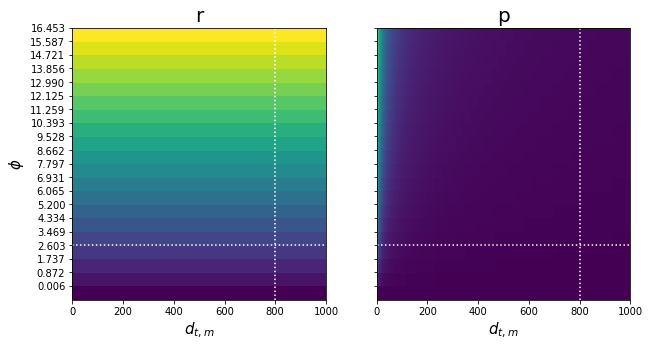

In [98]:
def neg_binom_params(mu, vr):
    """ 
    Convert mean/variance parameterization to scipy r and p

    References:
    https://en.wikipedia.org/wiki/Negative_binomial_distribution#Alternative_formulations
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html?highlight=nbinom
    https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_nbinom.html?highlight=nbinom
    """
    r = mu ** 2 / (vr - mu)
    p = r / (r + mu)
    # test mu & vr
    _mu, _vr = sps.nbinom.stats(r, p)
    if not np.allclose(_mu, mu) or not np.allclose(_vr, vr):
        print("ERROR")
    return r, p

def neg_binom_mu_phi(mu, phi):
    """
    Convert mean (mu) and overdispersion parameter (phi) to scipy r and p
    
    References:
    https://mc-stan.org/docs/2_23/functions-reference-2_23.pdf (13.2 pag.100)
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html?highlight=nbinom
    https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_nbinom.html?highlight=nbinom
    """
    r = np.array([[_phi for _ in range(len(mu))] for _phi in phi])
    p = phi[:,None] / (phi[:,None] + mu)
    return r, p

r, p = neg_binom_mu_phi(mu=d_tm, phi=phi)
print(r.shape)
print(p.shape)

fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
ax[0].pcolormesh(r)
ax[0].set_title("r", fontsize=20)
ax[0].set_xlabel("$d_{t,m}$", fontsize=15)
ax[0].set_yticks([i+1 for i in range(len(phi))])
ax[0].set_yticklabels(f"{p:.3f}" for p in phi)
ax[0].set_ylabel("$\phi$", fontsize=15)
ax[1].pcolormesh(p)
ax[1].set_title("p", fontsize=20)
ax[1].set_xlabel("$d_{t,m}$", fontsize=15)

ax[0].axhline(4, c="w", ls=":")
ax[1].axhline(4, c="w", ls=":")
ax[0].axvline(800, c="w", ls=":")
ax[1].axvline(800, c="w", ls=":")

D_tm_matrix = []
for i in range(r.shape[0]):
    print(f"r={r[i][499]:>23.20f} p={p[i][499]:>22.20f} phi={phi[i]:23.20f}")
    D_tm_matrix.append(sps.nbinom.pmf(d_tm[:,None], n=r[i], p=p[i]))
D_tm_matrix = np.array(D_tm_matrix)

/Users/massimopierini/opt/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


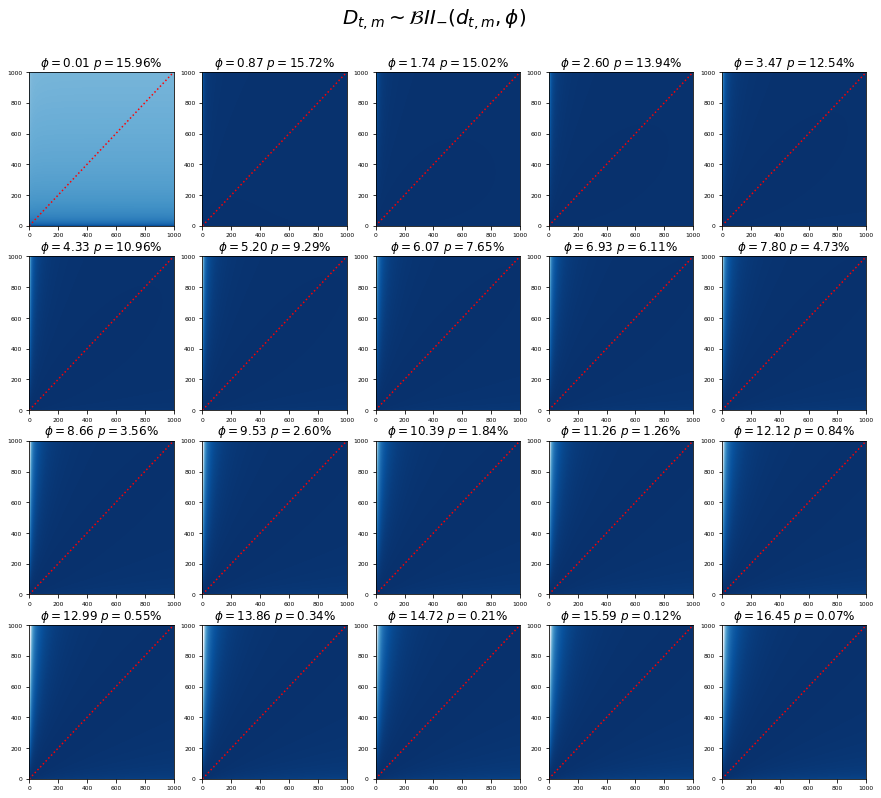

In [99]:
fig, ax = plt.subplots(4, 5, figsize=(15, 13))

for i in range(r.shape[0]):
    ax.flat[i].pcolormesh(np.log(D_tm_matrix[i]), cmap="Blues")
    ax.flat[i].tick_params(labelsize=6)
    ax.flat[i].set_title(f"$\phi={phi[i]:.2f}$ $p={phi_pdf[i]*100:.2f}\%$")
    ax.flat[i].plot([0,1000],[0,1000], c="r", ls=":")
fig.suptitle(
    f"$D_{{t,m}} \sim \mathcal{{B}}II_{{-}}(d_{{t,m}},\phi)$",
    fontsize=20, y=.95
)
plt.show();

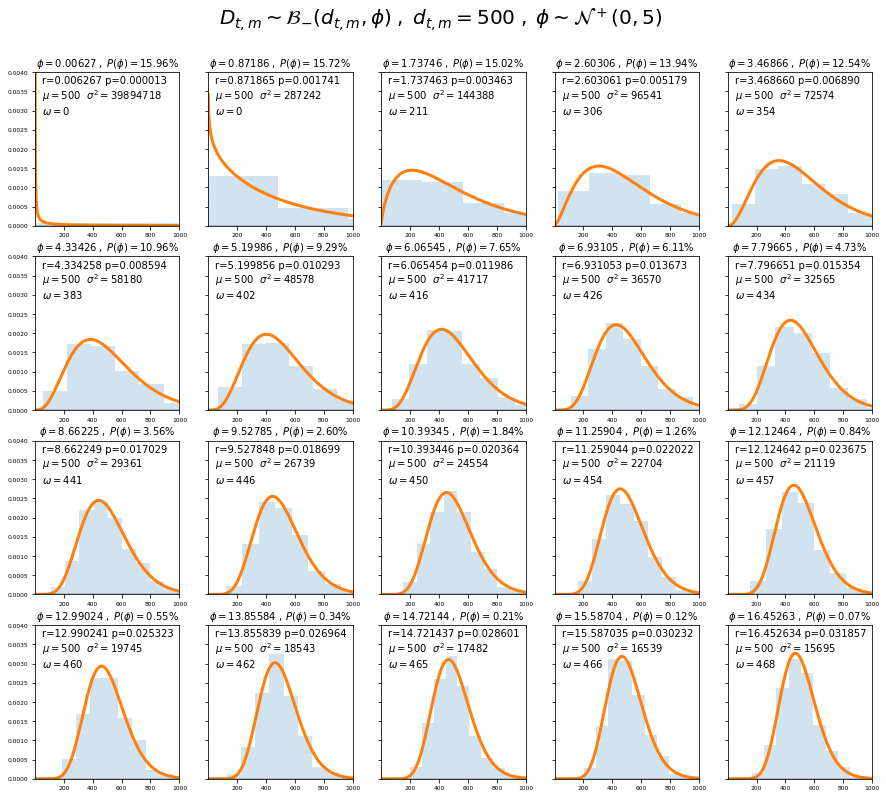

In [126]:
d_test = 499

fig, ax = plt.subplots(4, 5, figsize=(15, 13), sharey=True)

for i in range(r.shape[0]):
    mu, vr = sps.nbinom.stats(n=r[i][d_test], p=p[i][d_test])
    mode = sps.nbinom.pmf(d_tm, n=r[i][d_test], p=p[i][d_test]).argmax()
    ax.flat[i].hist(sps.nbinom.rvs(r[i][d_test], p[i][d_test], size=1000), density=True, alpha=.2)
    ax.flat[i].text(50, .0037, f"r={r[i][d_test]:.6f} p={p[i][d_test]:.6f}")
    ax.flat[i].text(50, .0033, f"$\mu={mu:.0f}$  $\sigma^2={vr:.0f}$")
    ax.flat[i].text(50, .0029, f"$\omega={mode}$")
    ax.flat[i].plot(d_tm, sps.nbinom.pmf(d_tm, n=r[i][d_test], p=p[i][d_test]), lw=3)
    ax.flat[i].tick_params(labelsize=6)
    ax.flat[i].set_xlim(d_tm[0], d_tm[-1])
    #ax.flat[i].axvline(d_tm[d_test], ls=":", c="r")
    ax.flat[i].axhline(0, c="k", alpha=.25)
    ax.flat[i].set_title(f"$\phi={phi[i]:.5f} \;,\; P(\phi)={phi_pdf[i]*100:.2f}\%$", fontsize=10)
    ax.flat[i].set_ylim(0,.004)
fig.suptitle(
    f"$D_{{t,m}} \sim \mathcal{{B}}_{{-}}(d_{{t,m}},\phi) \;,\; d_{{t,m}}={d_tm[d_test]:.0f} \;,\; \phi \sim \mathcal{{N}}^+(0,5)$",
    fontsize=20, y=.95
)
fig.set_facecolor('w')
plt.show();

In [14]:
ifr = {
    "Lombardia": 1.1/100
}

In [15]:
ifr_mu = 1; ifr_sd = .1;
ifr_N = np.linspace(
    sps.norm.ppf(0.00001, loc=ifr_mu, scale=ifr_sd), 
    sps.norm.ppf(0.99999, loc=ifr_mu, scale=ifr_sd), 
    101
)

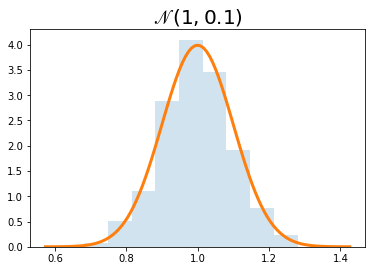

In [150]:
# Distribuzione normale
ifr_mu = 1; ifr_sd = .1;

ifr_N_rvs = sps.norm.rvs(loc=ifr_mu, scale=ifr_sd, size=1000)
ifr_N_pdf = sps.norm.pdf(ifr_N, loc=ifr_mu, scale=ifr_sd)

plt.hist(ifr_N_rvs, density=True, alpha=.2)
plt.plot(ifr_N, ifr_N_pdf, lw=3)
plt.title(
    f"$\mathcal{{N}}({ifr_mu},{ifr_sd})$",
    fontsize=20
)
plt.show();

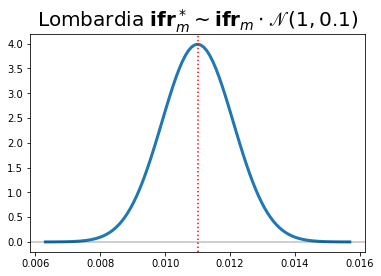

In [149]:
ifr_mu = 1; ifr_sd = .1;

ifr_times_N = ifr["Lombardia"] * ifr_N

#ifr_rvs = ifr["Lombardia"] * ifr_N_rvs
#plt.hist(ifr_rvs, alpha=.2)
plt.plot(ifr_times_N, ifr_N_pdf, lw=3)
plt.title(
    f"Lombardia $\mathbf{{ifr}}_m^* \sim \mathbf{{ifr}}_m \cdot \mathcal{{N}}({ifr_mu},{ifr_sd})$",
    fontsize=20
)
plt.axvline(ifr["Lombardia"], ls=":", c="r")
plt.axhline(0, c="k", alpha=.25)
plt.show();


    GIVEN
        mean = 6.5
        beta = 0.62
    FOUND
        alpha = 4.03 
        theta = 1.6129032258064517
        


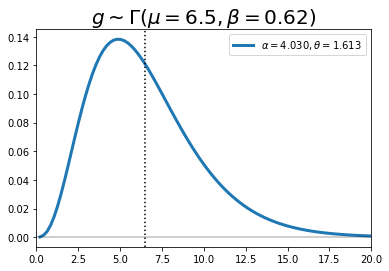

In [148]:
def get_alpha_and_theta(mu, beta, show=True):
    alpha = mu * beta
    theta = 1 / beta
    if show:
        print(f"""
    GIVEN
        mean = {mu}
        beta = {beta}
    FOUND
        alpha = {alpha} 
        theta = {theta}
        """)
    return alpha, theta

# Serial interval
g_mean = 6.5
g_beta = .62
g_alpha, g_theta = get_alpha_and_theta(g_mean, g_beta)

g = np.linspace(
    sps.gamma.ppf(1e-5, a=g_alpha, scale=g_theta),
    sps.gamma.ppf(1-1e-3, a=g_alpha, scale=g_theta),
    101
)

plt.plot(
    g, 
    sps.gamma.pdf(g, a=g_alpha, scale=g_theta), 
    label=fr"$\alpha={g_alpha:.3f}, \theta={g_theta:.3f}$",
    lw=3
)
plt.axvline(g_mean, c="k", ls=":")
plt.axhline(0, c="k", alpha=.25)
plt.title(fr"$g \sim \Gamma(\mu={g_mean},\beta={g_beta})$", fontsize=20)
plt.xlim(0,20)
plt.legend()
plt.show();

# Convoluzione Gamma

$$
\gamma(\mu,\beta) = \gamma_1(\mu_1, \beta_1) + \gamma_2(\mu_2, \beta_2)
$$

$$
\mu = \mu_1 + \mu_2
$$

$$
\alpha_1 = \mu_1 \cdot \beta_1
$$

$$
\alpha_2 = \mu_2 \cdot \beta_2
$$

$$
\alpha = \alpha_1 + \alpha_2
$$

$$
\beta = \frac{\alpha}{\mu}
$$

$$
\theta = \frac{1}{\beta}
$$

$$
\gamma \left( \mu_1 + \mu_2, \frac{(\mu_1 \cdot \beta_1 + \mu_2 \cdot \beta_2)}{\mu_1 + \mu_2} \right)
$$


    GIVEN
        mean = 5.1
        beta = 0.86
    FOUND
        alpha = 4.385999999999999 
        theta = 1.1627906976744187
        

    GIVEN
        mean = 18.8
        beta = 0.45
    FOUND
        alpha = 8.46 
        theta = 2.2222222222222223
        

    GIVEN
        mean1=5.1  beta1=0.86
        mean2=18.8  beta2=0.45
    FOUND
        alpha=12.846  beta=0.537489539748954  theta=1.860501323369142
        mean=23.9  vr=44.46598162852249  sd=6.668281759833075
        


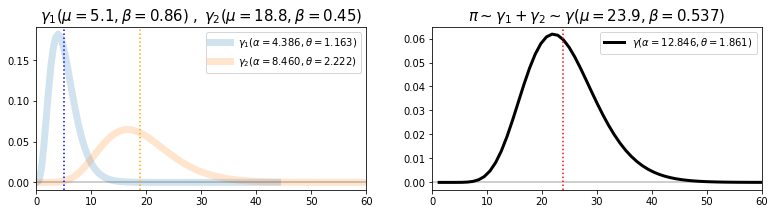

In [154]:
def approx_gamma_sum(mean1, beta1, mean2, beta2, show=True):
    """
    Approximate convolution of indipendent Gamma distributions
    
    References:
    https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions
    https://en.wikipedia.org/wiki/Gamma_distribution
    https://link.springer.com/article/10.1007/s40096-015-0169-2
    https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#shape-parameters
    """
    
    alpha1 = mean1 * beta1
    alpha2 = mean2 * beta2
    alpha = alpha1 + alpha2
    mean = mean1 + mean2
    beta = alpha / mean
    theta = 1 / beta
    if show:
        m, v = sps.gamma.stats(a=alpha, scale=theta)
        print(f"""
    GIVEN
        mean1={mean1}  beta1={beta1}
        mean2={mean2}  beta2={beta2}
    FOUND
        alpha={alpha}  beta={beta}  theta={theta}
        mean={m}  vr={v}  sd={np.sqrt(v)}
        """)
    return alpha, theta, mean, beta

pi_mean1 = 5.1
pi_beta1 = .86
pi_alpha1, pi_theta1 = get_alpha_and_theta(pi_mean1, pi_beta1)

pi_mean2 = 18.8
pi_beta2 = .45
pi_alpha2, pi_theta2 = get_alpha_and_theta(pi_mean2, pi_beta2)

days1 = np.linspace(
    sps.gamma.ppf(1e-10, a=pi_alpha1, scale=pi_theta1), 
    sps.gamma.ppf(1-1e-12, a=pi_alpha1, scale=pi_theta1), 
    101
)
days2 = np.linspace(
    sps.gamma.ppf(1e-10, a=pi_alpha2, scale=pi_theta2), 
    sps.gamma.ppf(1-1e-12, a=pi_alpha2, scale=pi_theta2), 
    101
)

pi_alpha, pi_theta, pi_mean, pi_beta = approx_gamma_sum(pi_mean1, pi_beta1, pi_mean2, pi_beta2)

days = np.linspace(
    sps.gamma.ppf(1e-12, a=pi_alpha, scale=pi_theta), 
    sps.gamma.ppf(1-1e-12, a=pi_alpha, scale=pi_theta), 
    101
)
pi1 = sps.gamma.pdf(days1, a=pi_alpha1, scale=pi_theta1)
pi2 = sps.gamma.pdf(days2, a=pi_alpha2, scale=pi_theta2)
pi = sps.gamma.pdf(days, a=pi_alpha, scale=pi_theta)

fig, ax = plt.subplots(1, 2, figsize=(13, 3))

ax[0].plot(days1, pi1, lw=7, alpha=.2, label=fr"$\gamma_1(\alpha={pi_alpha1:.3f}, \theta={pi_theta1:.3f})$")
ax[0].plot(days2, pi2, lw=7, alpha=.2, label=fr"$\gamma_2(\alpha={pi_alpha2:.3f}, \theta={pi_theta2:.3f})$")
ax[1].plot(days, pi, label=fr"$\gamma(\alpha={pi_alpha:.3f},\theta={pi_theta:.3f})$", c="k", lw=3)

ax[0].set_title(
    fr"$\gamma_1(\mu={pi_mean1},\beta={pi_beta1}) \;,\; \gamma_2(\mu={pi_mean2},\beta={pi_beta2})$",
    fontsize=15
)
ax[1].set_title(
    fr"$\pi \sim \gamma_1 + \gamma_2 \sim \gamma(\mu={pi_mean}, \beta={pi_beta:.3f})$",
    fontsize=15
)
ax[0].axhline(0, c="k", alpha=.25)
ax[1].axhline(0, c="k", alpha=.25)
ax[0].axvline(pi_mean1, c="b", ls=":")
ax[0].axvline(pi_mean2, c="orange", ls=":")
ax[1].axvline(pi_mean, c="r", ls=":")
ax[0].set_xlim(0, 60)
ax[1].set_xlim(0, 60)
ax[0].legend()
ax[1].legend()
fig.set_facecolor('w')
plt.show();

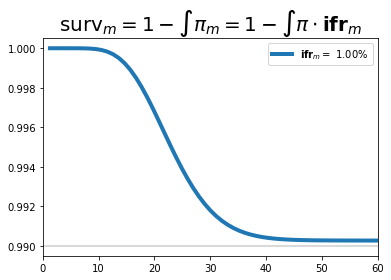

In [155]:
ifr_test = 1/100
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(
    days,
    1-(pi*ifr_test).cumsum(),
    lw=4,
    label=fr"$\mathbf{{ifr}}_m =$ {ifr_test:.2%}"
)
ax.set_xlim(0, 60)
ax.axhline(0.99, c="k", alpha=.2)
ax.set_title(
    f"$\mathrm{{surv}}_m = 1-\int\pi_m = 1-\int \pi \cdot \mathbf{{ifr}}_m$",
    fontsize=20
)
ax.legend()
fig.set_facecolor('w')
plt.plot();

***

**WIP**

***

$$
d_{t,m} = \mathbb{E}(D_{t,m})
$$

$$
d_{t,m} = \mathbf{ifr}_m^* \sum_{\tau=0}^{t-1} c_{\tau,m} \pi_{t-\tau}
$$

$$
\pi_s = \int_{s-0.5}^{s+0.5} \; \pi(\tau) \; d\tau  \;,\; s=\{2,3 \cdots t\}
$$

$$
\pi_1 = \int_{0}^{1.5} \pi(\tau) \; d\tau 
$$

$$
\pi(\tau) = \mathrm{density}
$$